# **K-Means Clustering**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("countries.csv")

## *About Data*

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA(EX.NEAREAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERNEUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERNAFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERNEUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.shape

(227, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [7]:
df.Region.unique()

array(['ASIA(EX.NEAREAST)', 'EASTERNEUROPE', 'NORTHERNAFRICA', 'OCEANIA',
       'WESTERNEUROPE', 'SUB-SAHARANAFRICA', 'LATINAMER.&CARIB',
       'C.W.OFIND.STATES', 'NEAREAST', 'NORTHERNAMERICA', 'BALTICS'],
      dtype=object)

## *Data Cleaning*

In [8]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
df[df["Agriculture"].isnull()]["Country"]

3            American Samoa 
4                   Andorra 
78                Gibraltar 
80                Greenland 
83                     Guam 
134                 Mayotte 
140              Montserrat 
144                   Nauru 
153      N. Mariana Islands 
171            Saint Helena 
174    St Pierre & Miquelon 
177              San Marino 
208       Turks & Caicos Is 
221       Wallis and Futuna 
223          Western Sahara 
Name: Country, dtype: object

In [10]:
df[df["Agriculture"].isna()] = df[df["Agriculture"].isna()].fillna(0)

In [11]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [12]:
df[df["Literacy (%)"].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERNEUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERNEUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAREAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERNEUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERNEUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.0,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERNEUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.0,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.0,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERNEUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERNEUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.0,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.0,30.01,3.92,0.420,0.110,0.470


In [13]:
df.groupby("Region")["Literacy (%)"].mean().sort_values(ascending= False)

Region
BALTICS              99.733333
C.W.OFIND.STATES     98.725000
EASTERNEUROPE        97.088889
WESTERNEUROPE        94.291667
LATINAMER.&CARIB     90.654545
OCEANIA              83.900000
ASIA(EX.NEAREAST)    79.553571
NEAREAST             79.521429
NORTHERNAMERICA      78.200000
SUB-SAHARANAFRICA    61.284314
NORTHERNAFRICA       56.033333
Name: Literacy (%), dtype: float64

In [14]:
df["Literacy (%)"] = df["Literacy (%)"].fillna(df.groupby("Region")["Literacy (%)"].transform("mean"))

In [15]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [16]:
df["Climate"] = df["Climate"].fillna(df.groupby("Region")["Climate"].transform("mean"))

In [17]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [18]:
columns = ["Net migration", "Infant mortality (per 1000 births)", 
           "Phones (per 1000)", "Arable (%)", "Crops (%)", 
           "Other (%)", "Birthrate", "Deathrate", "Industry", "Service"]

for i in columns:
    df[i] = df[i].fillna(df.groupby("Region")[i].transform("mean"))

In [19]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## *Visualization*

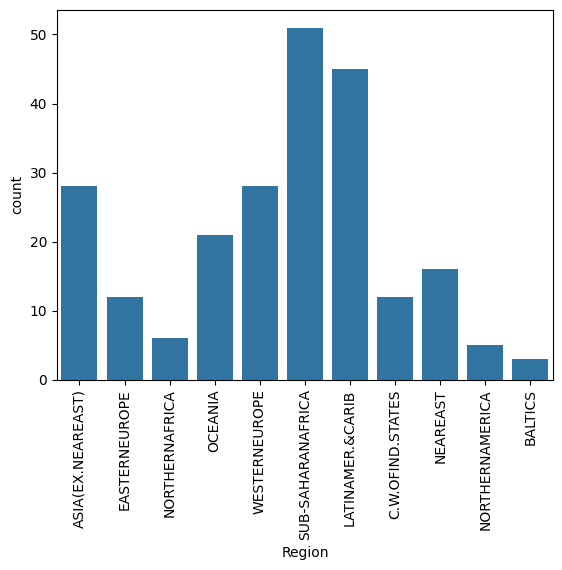

In [20]:
sns.countplot(x= "Region", data= df)
plt.xticks(rotation= 90);

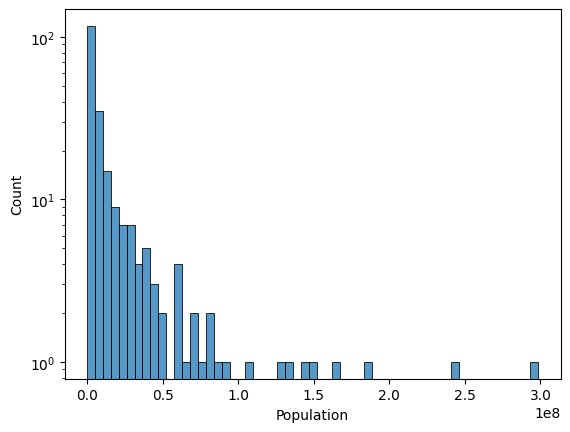

In [21]:
sns.histplot(data= df[df["Population"] < 400000000], x= "Population")
plt.yscale("log")

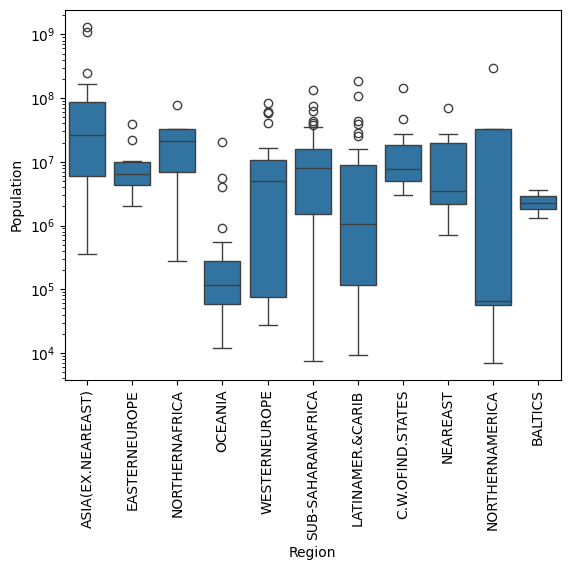

In [22]:
sns.boxplot(x= "Region", y= "Population", data= df)
plt.yscale("log")
plt.xticks(rotation= 90);

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

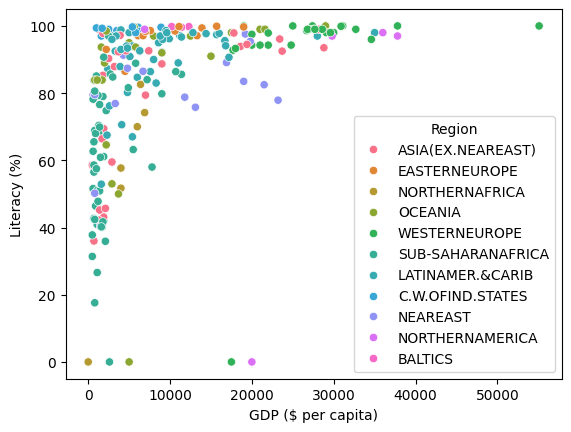

In [23]:
# GDP and Literacy
sns.scatterplot(data= df, x= "GDP ($ per capita)", y= "Literacy (%)", hue= "Region")

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

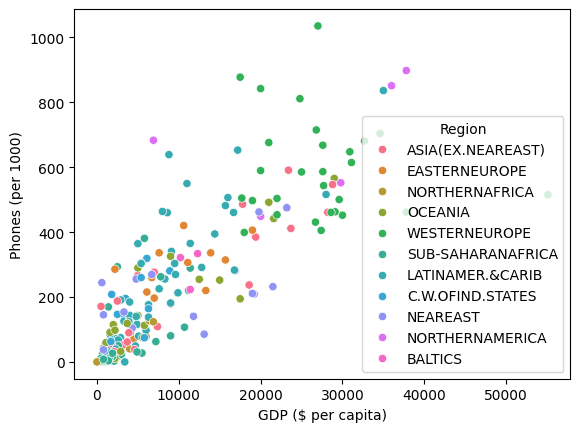

In [24]:
# Phone and GDP
sns.scatterplot(data= df, x= "GDP ($ per capita)", y= "Phones (per 1000)", hue= "Region")

<Axes: xlabel='GDP ($ per capita)', ylabel='Birthrate'>

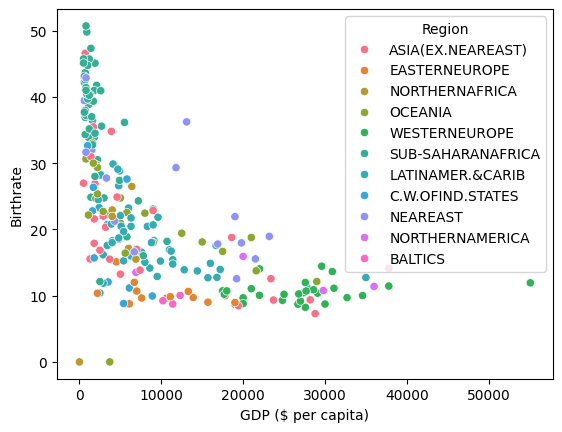

In [25]:
# Birthrate and GDP
sns.scatterplot(data= df, x= "GDP ($ per capita)", y= "Birthrate", hue= "Region")

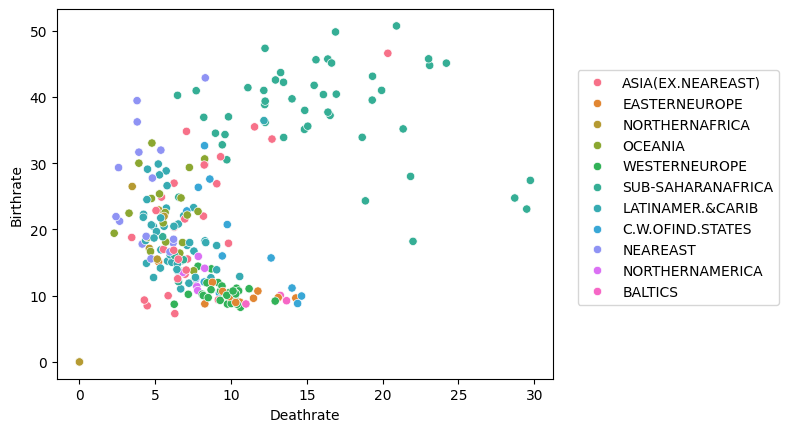

In [26]:
# Birthrate and Deathrate
sns.scatterplot(data= df, x= "Deathrate", y= "Birthrate", hue= "Region")
plt.legend(loc= (1.05, 0.2))

<Axes: >

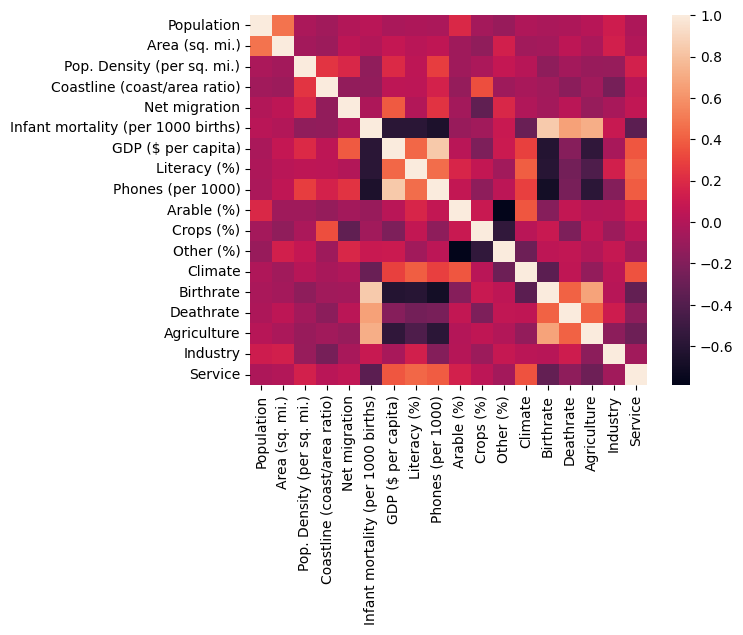

In [27]:
sns.heatmap(data= df.corr(numeric_only= True))

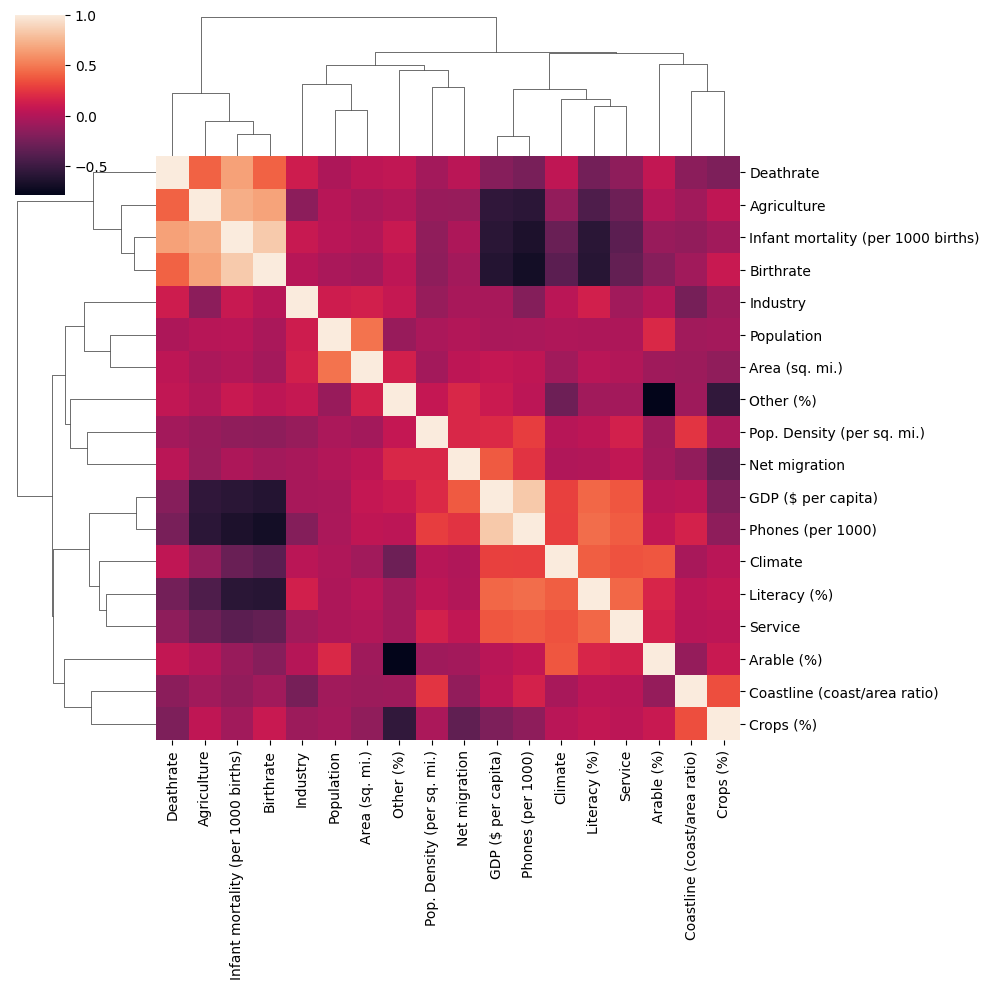

In [28]:
sns.clustermap(data= df.corr(numeric_only= True))

## *Model*

In [29]:
X = df.drop("Country", axis= 1)
X = pd.get_dummies(X, drop_first= True)

X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W.OFIND.STATES,Region_EASTERNEUROPE,Region_LATINAMER.&CARIB,Region_NEAREAST,Region_NORTHERNAFRICA,Region_NORTHERNAMERICA,Region_OCEANIA,Region_SUB-SAHARANAFRICA,Region_WESTERNEUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


In [30]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.31928318,
        -0.53830542, -0.37510468],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.14654488,  0.08642673, -0.21958445, ..., -0.31928318,
         1.85768146, -0.37510468],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.31928318,
         1.85768146, -0.37510468]])

In [31]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.019695,0.027583,-0.199844,-0.293443,4.750812,3.629803,-0.892453,-2.009534,-1.016724,-0.124743,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.022937,-0.385888,-0.513413,0.224607,-0.716619,0.565132,...,-0.115728,-0.23625,4.232808,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
2,0.035618,0.998421,-0.220490,-0.292889,-0.086430,-0.116946,-0.363792,-0.505360,-0.686168,-0.810769,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
3,-0.243834,-0.334779,-0.053514,0.514709,-4.278020,-0.733414,-0.164297,0.689131,0.114406,-0.288743,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,3.132016,-0.538305,-0.375105
4,-0.243720,-0.334629,-0.137002,-0.293443,1.355460,-0.881502,0.932923,0.821852,1.163449,-0.887764,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,2.665923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,0.608730,-0.439790,-0.882478,-0.084128,-0.390035,0.242523,...,-0.115728,-0.23625,-0.236250,-0.497245,3.631460,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
223,-0.242004,-0.185982,-0.228217,-0.287620,-0.005982,-0.996398,-0.962276,-3.602188,-1.030847,-1.057153,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
224,-0.061923,-0.039330,-0.204312,-0.288452,-0.005982,0.748321,-0.882478,-1.381320,-0.866672,-0.844646,...,-0.115728,-0.23625,-0.236250,-0.497245,3.631460,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
225,-0.146545,0.086427,-0.219584,-0.293443,-0.005982,1.508338,-0.882478,-0.036412,-0.994658,-0.513568,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,1.857681,-0.375105


## *K Means Modelling*

In [32]:
from sklearn.cluster import KMeans

ssd = []

for k in range(2, 50):
    model = KMeans(n_clusters= k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

Text(0, 0.5, 'Sum of squared distances of points')

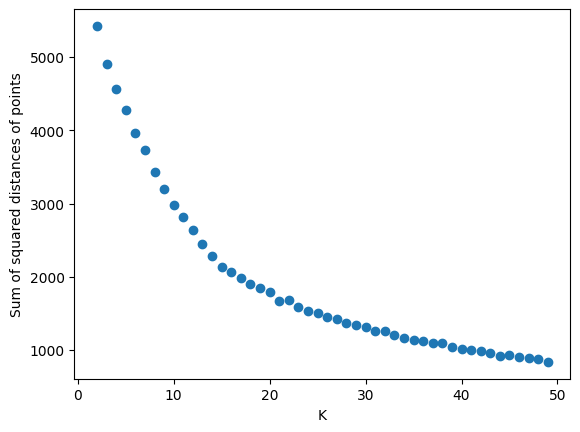

In [33]:
plt.plot(range(2, 50), ssd, "o")
plt.xlabel("K")
plt.ylabel("Sum of squared distances of points")

In [34]:
model = KMeans(n_clusters= 3)
model.fit(scaled_X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [35]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [36]:
X["Cluster"] = model.labels_

In [37]:
X.corr()["Cluster"].sort_values()

Literacy (%)                         -0.395779
Region_LATINAMER.&CARIB              -0.370792
Region_OCEANIA                       -0.289658
Phones (per 1000)                    -0.213777
Crops (%)                            -0.187542
Region_NEAREAST                      -0.187273
Region_C.W.OFIND.STATES              -0.166630
Coastline (coast/area ratio)         -0.161111
Region_NORTHERNAFRICA                -0.149482
Service                              -0.111979
GDP ($ per capita)                   -0.085815
Area (sq. mi.)                       -0.060277
Population                           -0.059883
Other (%)                            -0.043302
Industry                             -0.033645
Region_NORTHERNAMERICA               -0.027070
Pop. Density (per sq. mi.)            0.014887
Region_BALTICS                        0.035202
Climate                               0.045798
Region_EASTERNEUROPE                  0.048014
Region_WESTERNEUROPE                  0.097872
Arable (%)   

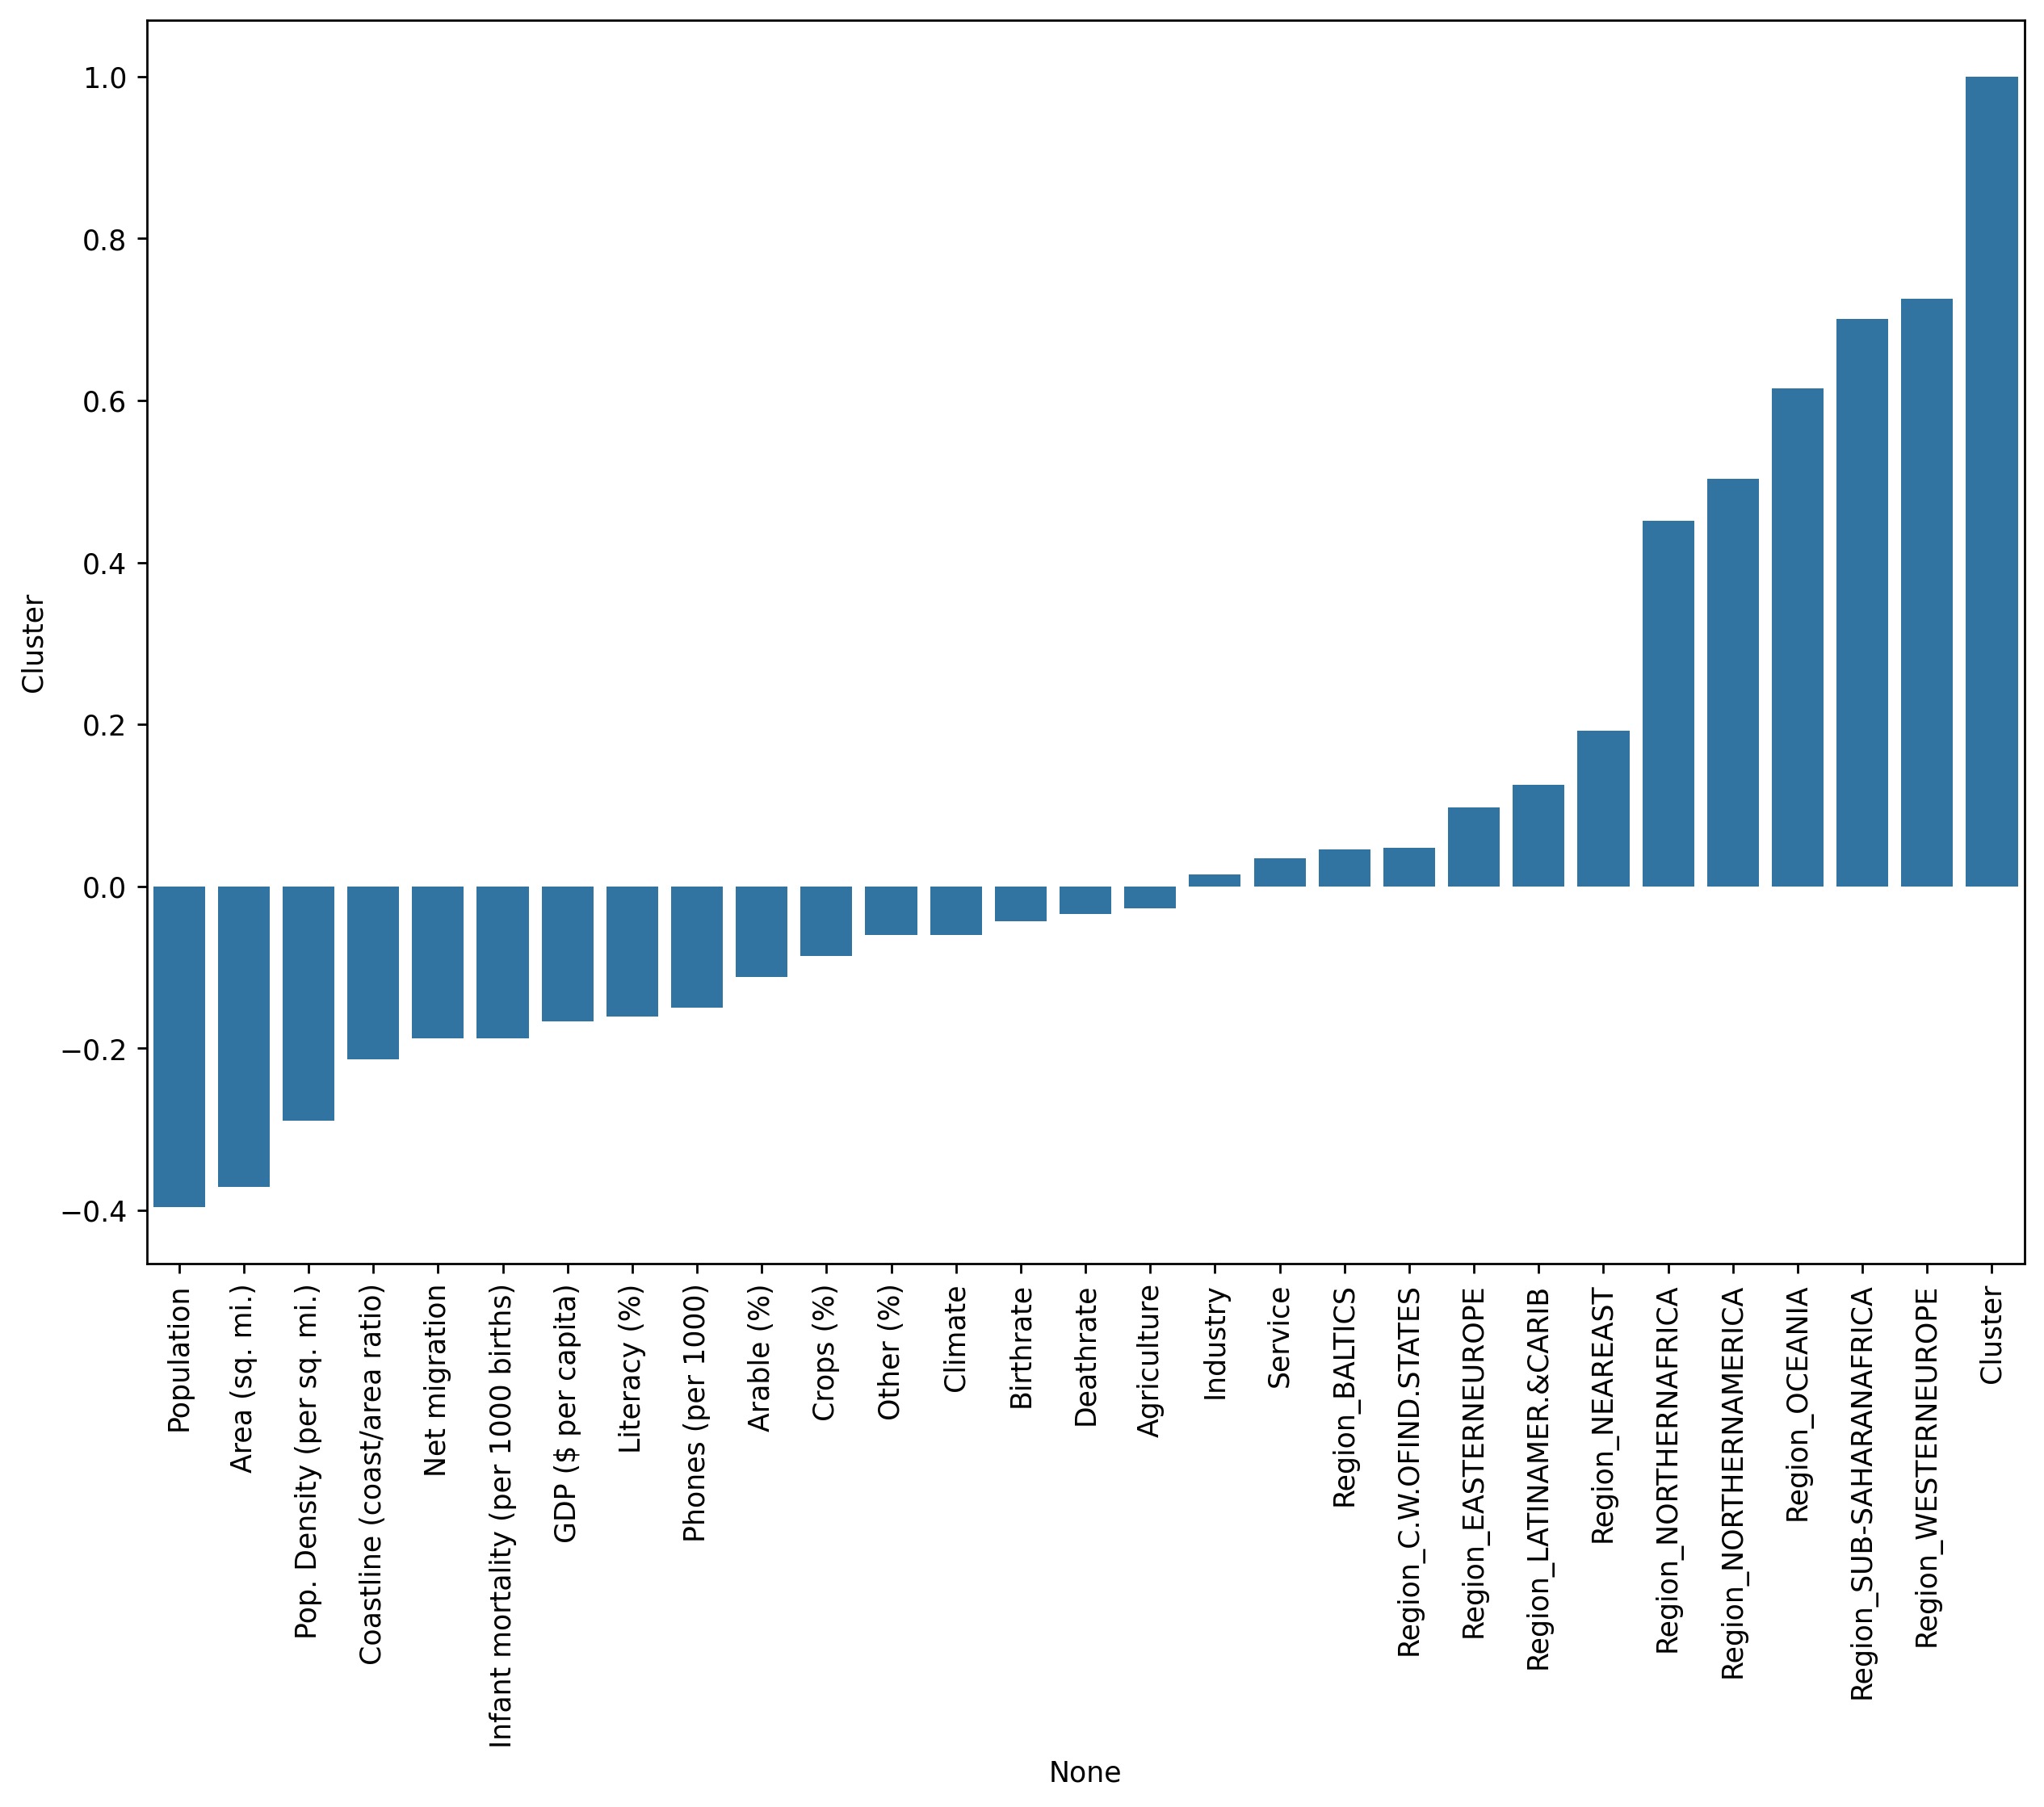

In [38]:
plt.figure(figsize=(12, 8), dpi= 250)
sns.barplot(x= X.columns, y= X.corr(numeric_only= True)["Cluster"].sort_values())
plt.xticks(rotation= 90);

## *Additional*

In [39]:
iso_df = pd.read_csv("iso.csv")

iso_df

,ISO Codes
0,AFG
1,ALB
2,DZA
3,ASM
4,AND
...,...
222,NaN
223,NaN
224,YEM
225,ZMB


In [40]:
df = pd.concat([df,iso_df], axis=1)

model = KMeans(n_clusters=3)
model.fit(scaled_X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [41]:
df['Cluster'] = model.labels_

In [42]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Codes",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()